# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

## Get Data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-02-14 01:39:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-02-14 01:39:33 (7.38 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Import time series with pandas

In [ ]:
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"],index_col=["Date"])
df.head()


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# how many samples do we have?
len(df)

2787

In [ ]:
# Only closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


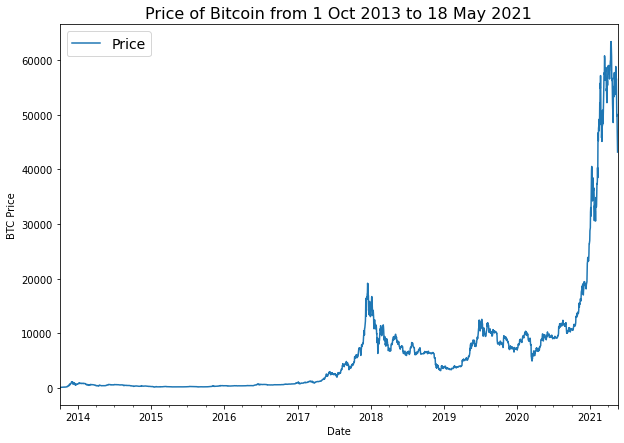

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

## Importing time series data with Python's CSV module

## Import and format historical Bitcoin data with Python

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as date not strings
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

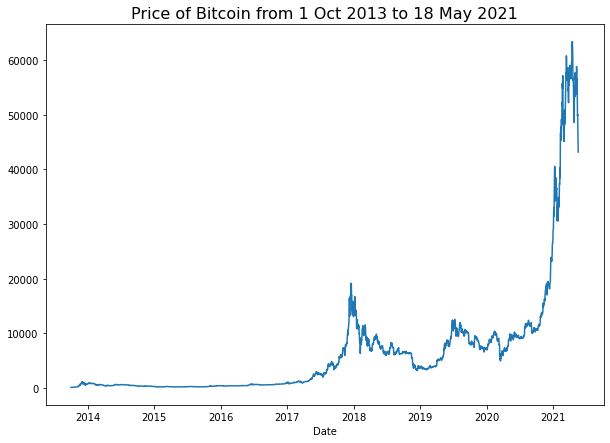

In [ ]:
# Plot from CSV

plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")

In [ ]:
import numpy as np
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10]

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
       '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
       '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
       '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
# Wrong way
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2229,), (2229,), (558,), (558,))

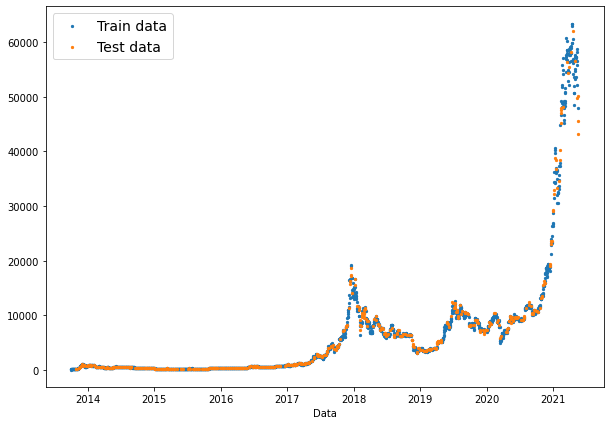

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Data")
plt.legend(fontsize=14)

### Create train & test for time series (the right way)

In [ ]:
# Create train and test splits right way for time series data
split_size = int(0.8*len(prices))

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

In [ ]:
len(X_train), len(X_test)

(2229, 558)

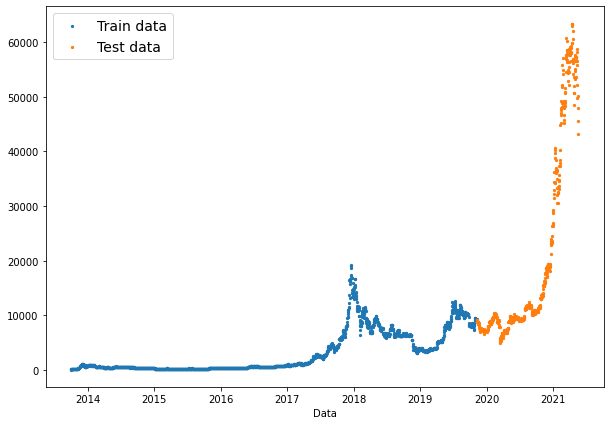

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Data")
plt.legend(fontsize=14)

## Create a plotting function
Typing plotting code is tedious

In [ ]:
# Create a function to plot time series data 

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

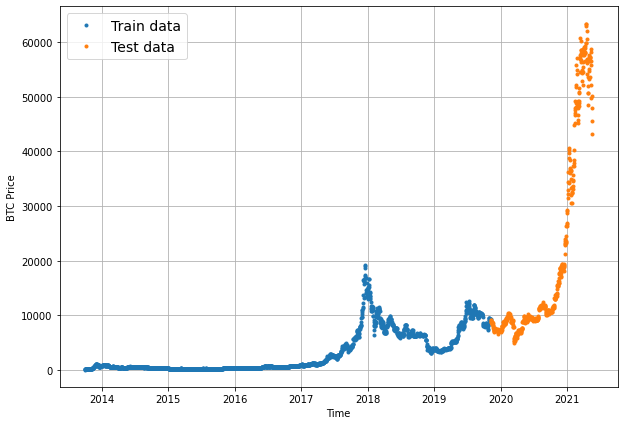

In [ ]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

##  Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series modelling

## Model 0: Navie forecast (baseline)

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

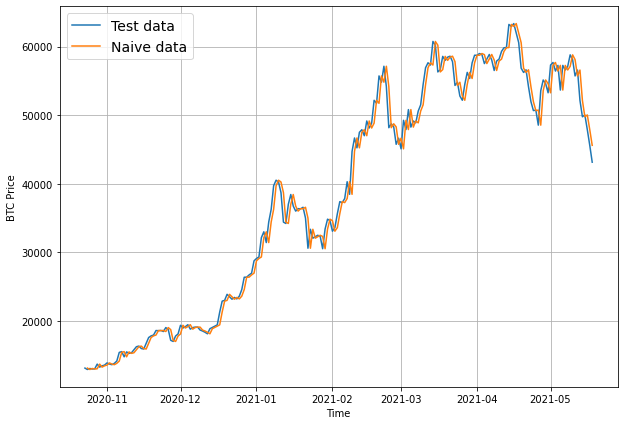

In [ ]:
# Plot naive forecast 
plt.figure(figsize=(10,7))
plot_time_series(X_test,y_test,start=350,format="-",label="Test data")
plot_time_series(X_test[1:],naive_forecast, start=350,format="-",label="Naive data")

## Evaluating a time series model

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [ ]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [ ]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts

## Format Data Part 2: Windowing our dataset

Window time series dataset to turn data into supervised learning probelm

In [ ]:
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction 

In [ ]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  return x[:,:-horizon], x[:,-horizon:]

In [ ]:
# Test window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window:{tf.squeeze(test_window).numpy()} -> Label:{tf.squeeze(test_label).numpy()}")

Window:[1 2 3 4 5 6 7] -> Label:8


In [ ]:
import numpy as np

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  windowed_array = x[window_indexes]
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels


In [ ]:
full_windows, full_labels = make_windows(prices,WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window:{full_windows[i]} -> Label: {full_labels[i]}")

Window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Turning windows into training and test data

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels), test_labels.shape,test_windows.shape,train_labels.shape

(2224, 556, 2224, 556, (556, 1), (556, 7), (2224, 1))

In [ ]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

## Make a modelling checkpoint callback

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            monitor="val_loss",
                                             verbose=0,
                                             save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)


In [ ]:
from tensorflow.keras import layers
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# 2. Compile
model_1.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(),metrics=["mae","mse"])

# 3. Fit the model
model_1.fit(x=train_windows, y=train_labels, epochs=100, verbose=1, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 170ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
Epoch 2/100
18/18 [==============================] - 2s 97ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 2s 93ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
Epoch 4/100
18/18 [==============================] - 2s 92ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
Epoch 5/100
18/18 [==============================] - 2s 91ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.7969 - val_loss: 895.2238 - val_mae: 895.2238 - val_mse: 2564574.0000
Epoch 6/100
18/18 [==============================] - 1s 86ms/step - loss: 158.

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

## Making forecasts with a model (on the test dataset)

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # reutrn 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

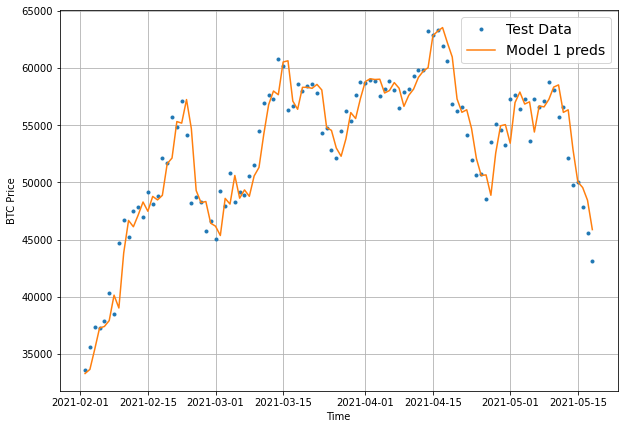

In [ ]:
# Let's plot our model 1 predictions 
offset = 450
plt.figure(figsize=(10,7))

plot_time_series(X_test[-len(test_windows):], test_labels[:,],start=offset, label="Test Data")
plot_time_series(X_test[-len(test_windows):], model_1_preds, start=offset, format="-", label="Model 1 preds")

## Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
# Make windows data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON),
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [ ]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615


608.9614868164062

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)


In [ ]:
# Evaluate results for model 2 predictions 
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mase': 1.0644706,
 'mse': 1281438.8,
 'rmse': 1132.0065}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

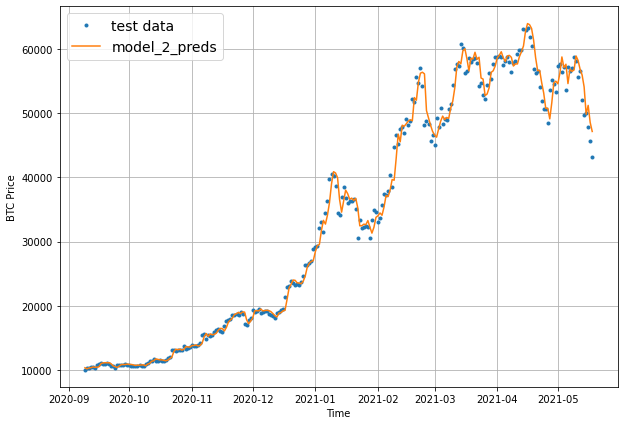

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds, format="-",start=offset,label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
# Make windows data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)

In [ ]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON),
], name="model_3_dense")

# Compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate model 3 on test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1321.5201


1321.5201416015625

In [ ]:
# Load in the best performing model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1237.5065


1237.5064697265625

In [ ]:
# Get forecast predictions
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

In [ ]:
# Evaluate results for model 3
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 513.60535 ,  355.08356 ,  327.1702  ,  358.50992 ,  420.53207 ,
         537.8537  ,  545.6606  ,  485.92307 ,  584.4969  ,  687.3814  ,
         836.22675 ,  755.15704 ,  731.4959  ,  775.3398  ,  567.9548  ,
         266.80865 ,  188.80217 ,  188.10764 ,  253.09521 ,  301.43365 ,
         151.10742 ,  196.81432 ,  191.46184 ,  231.65067 ,  143.6114  ,
         122.59033 ,  132.78844 ,  190.81152 ,  179.1598  ,  228.25949 ,
         314.44016 ,  379.093   ,  278.32553 ,  295.34598 ,  299.38525 ,
         248.64983 ,  299.7563  ,  259.6937  ,  180.30553 ,  206.72865 ,
         374.62897 ,  144.85135 ,  142.33607 ,  131.11572 ,   93.94057 ,
          54.825615,   73.7943  ,  103.60003 ,  121.33363 ,  168.67229 ,
         183.90945 ,  152.25314 ,  186.57121 ,  146.91301 ,  240.42961 ,
         351.00668 ,  540.9516  ,  549.15686 ,  521.2422  ,  526.85535 ,
         453.36307 ,  257.98166 ,  277.29492 ,  301.82465 ,  455.71756 ,
         458.96002 ,  503.44427 ,  522.3117 

## Make our evaluation function work for larger horizons

In [ ]:
model_3_results["mae"].ndim

1

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mape': 5.5588784,
 'mase': 2.2020733,
 'mse': 5405198.0,
 'rmse': 1425.7477}

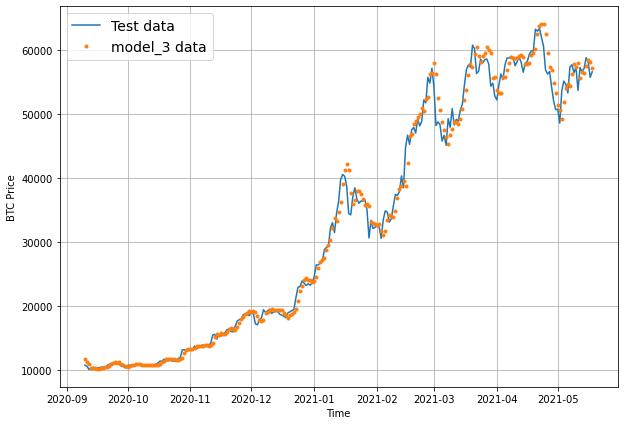

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, format="-",label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds,axis=1), start=offset, label="model_3 data")

## Which models is performing the best so far?

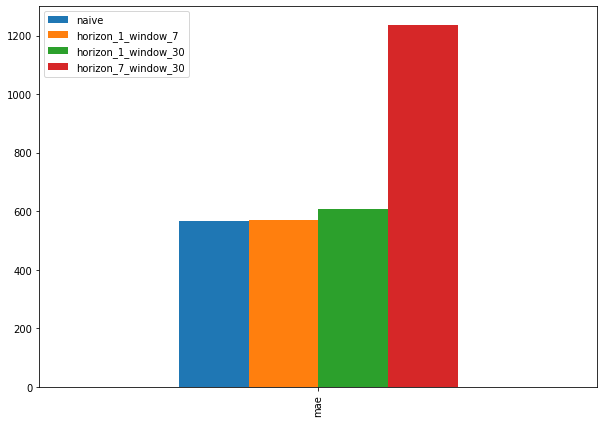

In [ ]:
import pandas as pd 
pd.DataFrame({"naive":naive_results["mae"],
              "horizon_1_window_7":model_1_results["mae"],
              "horizon_1_window_30":model_2_results["mae"],
              "horizon_7_window_30":model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")

## Model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create windoed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x   

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
from numpy.lib.shape_base import expand_dims
# Test out our lambda layer
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}\n")
print(f"Original values with expanded shpe: \n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)

Original values with expanded shpe: 
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# Create Conv1D
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
  layers.Dense(HORIZON)
], name='model_4_conv1D')

# Compile
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 9s 67ms/step - loss: 1207.3817 - val_loss: 2320.6218
Epoch 2/100
18/18 [==============================] - 1s 56ms/step - loss: 316.2171 - val_loss: 1467.2800
Epoch 3/100
18/18 [==============================] - 2s 128ms/step - loss: 192.6853 - val_loss: 1164.7075
Epoch 4/100
18/18 [==============================] - 2s 118ms/step - loss: 177.3535 - val_loss: 981.6695
Epoch 5/100
18/18 [==============================] - 2s 113ms/step - loss: 172.3466 - val_loss: 960.8711
Epoch 6/100
18/18 [==============================] - 1s 55ms/step - loss: 171.9754 - val_loss: 950.2025
Epoch 7/100
18/18 [==============================] - 1s 54ms/step - loss: 167.1943 - val_loss: 943.2872
Epoch 8/100
18/18 [==============================] - 1s 54ms/step - loss: 163.5991 - val_loss: 905.5262
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 162.5455 - val_loss: 929.7608
Epoch 10/100
18/18 [==============================] - 1s 5

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 610.1541


610.154052734375

In [ ]:
# Load back in best performing model 4
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8284


570.8284301757812

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.465, 8754.47 , 8983.928, 8759.672, 8703.628, 8708.294,
       8661.668, 8494.839, 8435.316, 8492.114], dtype=float32)>

In [ ]:
# Evaluate predictions 
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 570.8284,
 'mape': 2.5593357,
 'mase': 1.0027875,
 'mse': 1176671.2,
 'rmse': 1084.7448}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

## Model 5: RNN(LSTM)

In [ ]:
tf.random.set_seed(42)

# Build a LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32,activation="relu")(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 2439.7703INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 4s 164ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 817.7504 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
14/18 [======================>.......] - ETA: 0s - loss: 251.0760INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 167ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 186.1959INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 152ms/step - loss: 181.9180 - val_loss: 966.6430
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 172.8849INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 176.5974INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 150ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 10ms/step - loss: 157.6712 - val_loss: 914.8641
Epoch 9/100
18/18 [==============================] - 0s 10ms/step - loss: 166.5143 - val_loss: 1079.0775
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 158.8814INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 170ms/step - loss: 162.3369 - val_loss: 877.1689
Epoch 11/100
18/18 [==============================] - 0s 10ms/step - loss: 163.0841 - val_loss: 924.1126
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 168.5598 - val_loss: 941.6025
Epoch 13/100
18/18 [==============================] - 0s 10ms/step - loss: 166.4727 - val_loss: 934.8435
Epoch 14/100
18/18 [==============================] - 0s 10ms/step - loss: 163.9537 - val_loss: 920.2159
Epoch 15/100
14/18 [======================>.......] - ETA: 0s - loss: 154.0711INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 152.9470 - val_loss: 856.2653
Epoch 16/100
18/18 [==============================] - 0s 10ms/step - loss: 147.4420 - val_loss: 898.9912
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 151.0533 - val_loss: 943.1415
Epoch 18/100
18/18 [==============================] - 0s 10ms/step - loss: 157.8232 - val_loss: 924.0045
Epoch 19/100
18/18 [==============================] - 0s 10ms/step - loss: 155.9198 - val_loss: 911.4751
Epoch 20/100
18/18 [==============================] - 0s 10ms/step - loss: 155.6456 - val_loss: 862.6679
Epoch 21/100
18/18 [==============================] - 0s 10ms/step - loss: 153.1514 - val_loss: 862.5831
Epoch 22/100
18/18 [==============================] - 0s 11ms/step - loss: 151.4883 - val_loss: 863.8171
Epoch 23/100
18/18 [==============================] - 0s 10ms/step - loss: 150.7770 - val_loss: 886.8352
Epoch 24/100
18/18 [==============================] - 0s 10ms/step 

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 146.8467 - val_loss: 845.2780
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 150.1801INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 171ms/step - loss: 145.9843 - val_loss: 818.6807
Epoch 27/100
15/18 [========================>.....] - ETA: 0s - loss: 144.3840INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 149ms/step - loss: 144.4289 - val_loss: 804.3278
Epoch 28/100
15/18 [========================>.....] - ETA: 0s - loss: 139.9896INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 142.4610 - val_loss: 789.0858
Epoch 29/100
18/18 [==============================] - 0s 11ms/step - loss: 141.8738 - val_loss: 806.6756
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 142.0521 - val_loss: 794.8835
Epoch 31/100
16/18 [=========================>....] - ETA: 0s - loss: 138.2679INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 150ms/step - loss: 138.4690 - val_loss: 773.2811
Epoch 32/100
14/18 [======================>.......] - ETA: 0s - loss: 139.1369INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 171ms/step - loss: 137.1986 - val_loss: 772.2625
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 135.9342 - val_loss: 786.4801
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 135.2165INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 151ms/step - loss: 136.1931 - val_loss: 744.4506
Epoch 35/100
18/18 [==============================] - 0s 11ms/step - loss: 133.4514 - val_loss: 756.2968
Epoch 36/100
13/18 [====================>.........] - ETA: 0s - loss: 135.5200INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 152ms/step - loss: 134.0992 - val_loss: 735.1729
Epoch 37/100
18/18 [==============================] - 0s 10ms/step - loss: 130.6932 - val_loss: 745.9096
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 133.8555INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 129.2891 - val_loss: 717.2498
Epoch 39/100
18/18 [==============================] - 0s 10ms/step - loss: 129.6088 - val_loss: 719.0669
Epoch 40/100
18/18 [==============================] - 0s 10ms/step - loss: 129.6111 - val_loss: 732.0630
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 131.4351INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 169ms/step - loss: 127.1393 - val_loss: 702.9354
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 123.2224INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 125.6113 - val_loss: 700.8699
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 125.9959 - val_loss: 704.3680
Epoch 44/100
18/18 [==============================] - 0s 10ms/step - loss: 125.2330 - val_loss: 719.1411
Epoch 45/100
14/18 [======================>.......] - ETA: 0s - loss: 125.4368INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 129.0878 - val_loss: 687.3796
Epoch 46/100
18/18 [==============================] - 0s 10ms/step - loss: 124.9461 - val_loss: 706.3905
Epoch 47/100
15/18 [========================>.....] - ETA: 0s - loss: 122.2944INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 147ms/step - loss: 126.0465 - val_loss: 678.0845
Epoch 48/100
15/18 [========================>.....] - ETA: 0s - loss: 124.6099INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 167ms/step - loss: 123.9412 - val_loss: 677.1480
Epoch 49/100
18/18 [==============================] - 0s 10ms/step - loss: 123.1814 - val_loss: 700.9755
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 125.1446 - val_loss: 725.7572
Epoch 51/100
18/18 [==============================] - 0s 10ms/step - loss: 125.5208 - val_loss: 780.1040
Epoch 52/100
15/18 [========================>.....] - ETA: 0s - loss: 128.1749INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 123.5061 - val_loss: 663.2543
Epoch 53/100
18/18 [==============================] - 0s 11ms/step - loss: 120.0524 - val_loss: 665.6277
Epoch 54/100
13/18 [====================>.........] - ETA: 0s - loss: 117.3185INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 151ms/step - loss: 120.4394 - val_loss: 658.1812
Epoch 55/100
15/18 [========================>.....] - ETA: 0s - loss: 122.3055INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 171ms/step - loss: 118.6817 - val_loss: 650.8017
Epoch 56/100
15/18 [========================>.....] - ETA: 0s - loss: 119.2687INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 120.2385 - val_loss: 646.9162
Epoch 57/100
18/18 [==============================] - 0s 10ms/step - loss: 123.6108 - val_loss: 676.0363
Epoch 58/100
14/18 [======================>.......] - ETA: 0s - loss: 117.6747INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 149ms/step - loss: 118.2166 - val_loss: 642.8526
Epoch 59/100
18/18 [==============================] - 0s 10ms/step - loss: 117.8050 - val_loss: 644.1140
Epoch 60/100
14/18 [======================>.......] - ETA: 0s - loss: 119.1495INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 118.0277 - val_loss: 640.6298
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 117.6757 - val_loss: 674.2546
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 120.8419 - val_loss: 736.8734
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 122.4814 - val_loss: 641.0597
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 115.6879 - val_loss: 665.2364
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 117.4745INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 165ms/step - loss: 117.8764 - val_loss: 629.4848
Epoch 66/100
13/18 [====================>.........] - ETA: 0s - loss: 114.5638INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 149ms/step - loss: 115.7342 - val_loss: 627.8654
Epoch 67/100
15/18 [========================>.....] - ETA: 0s - loss: 114.6382INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 116.0720 - val_loss: 624.9843
Epoch 68/100
18/18 [==============================] - 0s 10ms/step - loss: 115.8544 - val_loss: 626.7468
Epoch 69/100
14/18 [======================>.......] - ETA: 0s - loss: 119.8649INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 150ms/step - loss: 119.5743 - val_loss: 623.6360
Epoch 70/100
15/18 [========================>.....] - ETA: 0s - loss: 113.5504INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 168ms/step - loss: 115.2881 - val_loss: 623.5431
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 114.6981 - val_loss: 640.9242
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 116.1623INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 117.3488 - val_loss: 621.0178
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 114.7942 - val_loss: 629.5701
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 115.1500 - val_loss: 626.9415
Epoch 75/100
18/18 [==============================] - 0s 10ms/step - loss: 115.9312 - val_loss: 662.2502
Epoch 76/100
14/18 [======================>.......] - ETA: 0s - loss: 116.2842INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 115.1412 - val_loss: 620.8359
Epoch 77/100
18/18 [==============================] - 0s 11ms/step - loss: 117.6456 - val_loss: 668.2390
Epoch 78/100
18/18 [==============================] - 0s 10ms/step - loss: 117.0707 - val_loss: 628.1731
Epoch 79/100
13/18 [====================>.........] - ETA: 0s - loss: 110.3536INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 165ms/step - loss: 113.6489 - val_loss: 610.1957
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 113.0044 - val_loss: 624.5187
Epoch 81/100
18/18 [==============================] - 0s 11ms/step - loss: 113.2803 - val_loss: 632.4530
Epoch 82/100
14/18 [======================>.......] - ETA: 0s - loss: 118.2068INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 147ms/step - loss: 115.9831 - val_loss: 607.7241
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 113.7448 - val_loss: 622.1393
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 114.0071 - val_loss: 619.6950
Epoch 85/100
18/18 [==============================] - 0s 10ms/step - loss: 114.1199 - val_loss: 640.6756
Epoch 86/100
18/18 [==============================] - 0s 10ms/step - loss: 115.0656 - val_loss: 613.5978
Epoch 87/100
18/18 [==============================] - 0s 10ms/step - loss: 112.2010 - val_loss: 607.8956
Epoch 88/100
14/18 [======================>.......] - ETA: 0s - loss: 116.5610INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 112.1981 - val_loss: 601.7839
Epoch 89/100
18/18 [==============================] - 0s 11ms/step - loss: 112.8817 - val_loss: 647.1225
Epoch 90/100
18/18 [==============================] - 0s 10ms/step - loss: 118.4780 - val_loss: 660.7481
Epoch 91/100
18/18 [==============================] - 0s 11ms/step - loss: 118.6482 - val_loss: 685.7650
Epoch 92/100
18/18 [==============================] - 0s 10ms/step - loss: 114.3789 - val_loss: 622.2435
Epoch 93/100
14/18 [======================>.......] - ETA: 0s - loss: 115.3346INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 113.3837 - val_loss: 599.4068
Epoch 94/100
18/18 [==============================] - 0s 10ms/step - loss: 111.0267 - val_loss: 600.6318
Epoch 95/100
15/18 [========================>.....] - ETA: 0s - loss: 110.9642INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 167ms/step - loss: 111.1373 - val_loss: 597.5020
Epoch 96/100
18/18 [==============================] - 0s 10ms/step - loss: 111.1646 - val_loss: 603.2917
Epoch 97/100
18/18 [==============================] - 0s 9ms/step - loss: 111.7010 - val_loss: 618.8985
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 111.8481 - val_loss: 598.4055
Epoch 99/100
15/18 [========================>.....] - ETA: 0s - loss: 110.2049INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 147ms/step - loss: 110.7292 - val_loss: 596.6447
Epoch 100/100
18/18 [==============================] - 0s 10ms/step - loss: 112.5656 - val_loss: 597.1186


In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 596.6447


596.6446533203125

In [ ]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8991.225, 8823.2  , 9009.359, 8847.859, 8742.254], dtype=float32)>

In [ ]:
# Evaluate mode 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred =model_5_preds)
model_5_results

{'mae': 596.64465,
 'mape': 2.6838453,
 'mase': 1.0481395,
 'mse': 1273486.9,
 'rmse': 1128.4888}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Make a multivariate time series model

In [ ]:
# Make a multivaritae time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add the bitcoin halving events to dataset
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [ ]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


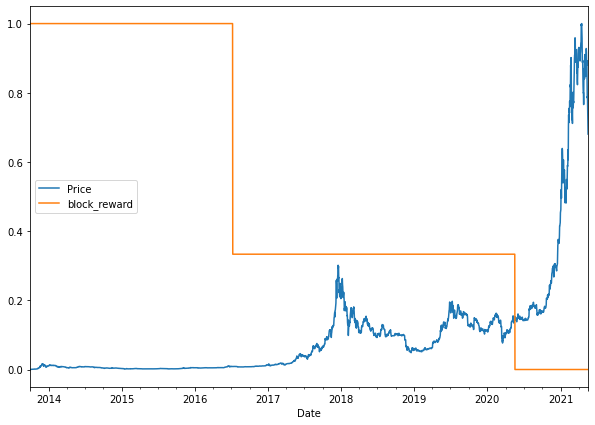

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), columns=bitcoin_prices_block.columns, index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas


In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7


In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


Create a way to window our dataset directly from a pnadas dataframe

In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense(multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
                              layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam()
                )

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1234.6805INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 44ms/step - loss: 1234.6805 - val_loss: 2061.9080
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 351.5053INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 351.5053 - val_loss: 1908.6729
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 235.4153INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 35ms/step - loss: 235.4153 - val_loss: 1329.0585
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 208.6112INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 208.6112 - val_loss: 1102.1340
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 196.5770 - val_loss: 1107.8472
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 187.2244INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 187.2244 - val_loss: 1036.1722
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 182.9338INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 55ms/step - loss: 182.0245 - val_loss: 1019.2924
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 175.7059INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 175.7059 - val_loss: 977.8487
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 170.1784INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 170.1784 - val_loss: 954.4034
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 163.4161INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 164.4430 - val_loss: 913.5146
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 158.9818INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 158.6892 - val_loss: 874.2504
Epoch 12/100
15/18 [========================>.....] - ETA: 0s - loss: 153.0774INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 152.0732 - val_loss: 861.0414
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 151.1057 - val_loss: 886.1201
Epoch 14/100
16/18 [=========================>....] - ETA: 0s - loss: 144.4726INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 147.5482 - val_loss: 837.8613
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 142.5062INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 142.3497 - val_loss: 794.4784
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 137.5206INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 137.5206 - val_loss: 778.4048
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 135.8191INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 135.8191 - val_loss: 772.4528
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 138.6812INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 134.8562 - val_loss: 747.4800
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 130.3347 - val_loss: 761.0549
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 128.6775INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 128.6775 - val_loss: 701.8977
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 128.7350INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 129.5576 - val_loss: 691.0128
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 125.8060INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 125.8060 - val_loss: 684.4119
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5263 - val_loss: 692.1294
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 123.8994INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 122.4765 - val_loss: 674.2213
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 121.6081INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 121.1171 - val_loss: 669.6445
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 127.2623 - val_loss: 690.0408
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 124.2509INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 124.6204 - val_loss: 643.9725
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2544 - val_loss: 656.2766
Epoch 29/100
14/18 [======================>.......] - ETA: 0s - loss: 120.2294INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 119.6374 - val_loss: 633.4545
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 120.1284INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 119.5001 - val_loss: 625.3953
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5633 - val_loss: 668.5061
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 116.9750INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 116.9750 - val_loss: 617.1060
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2438 - val_loss: 649.0985
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5187 - val_loss: 632.1378
Epoch 35/100
15/18 [========================>.....] - ETA: 0s - loss: 116.0261INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 113.6357 - val_loss: 607.4173
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2605 - val_loss: 626.4316
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 113.7021INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 113.7021 - val_loss: 606.2318
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 111.8183INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 111.4061 - val_loss: 603.2919
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 112.3873INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 112.7722 - val_loss: 596.0060
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 110.8327INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 54ms/step - loss: 110.5418 - val_loss: 593.2170
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8671 - val_loss: 609.1066
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7249 - val_loss: 607.4875
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3313 - val_loss: 606.2031
Epoch 44/100
15/18 [========================>.....] - ETA: 0s - loss: 108.7434INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 109.7027 - val_loss: 586.1214
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8748 - val_loss: 593.8447
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8641 - val_loss: 586.4578
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3587 - val_loss: 655.4485
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1614 - val_loss: 598.7232
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3029 - val_loss: 589.2487
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1971 - val_loss: 649.3792
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8514 - val_loss: 602.7665
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8331 - val_loss: 599.2959
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 110.4069 - val_loss: 575.7751
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6609 - val_loss: 785.9759
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 124.9824 - val_loss: 670.3788
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8591 - val_loss: 580.2875
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2513 - val_loss: 597.5087
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2322 - val_loss: 632.2953
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3519 - val_loss: 591.5410
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4084 - val_loss: 617.5808
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5326 - val_loss: 613.1470
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 112.0475 - val_loss: 575.5543
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2830 - val_loss: 590.7806
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7917 - val_loss: 586.8845
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2987 - val_loss: 696.5294
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 124.7808 - val_loss: 698.5267
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3443 - val_loss: 581.2104
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9960 - val_loss: 607.6739
Epoch 72/100
16/18 [=========================>....] - ETA: 0s - loss: 104.9060INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 106.7710 - val_loss: 573.6144
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2485 - val_loss: 618.8955
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 105.5330 - val_loss: 574.9454
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3177 - val_loss: 606.1973
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8084 - val_loss: 582.2406
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 108.0617INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 107.2528 - val_loss: 571.8563
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 106.2309 - val_loss: 572.2827
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8568 - val_loss: 596.5464
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8419 - val_loss: 577.2399
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 105.1101INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 105.1101 - val_loss: 568.4897
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1867 - val_loss: 592.5613
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9631 - val_loss: 651.6219
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6690 - val_loss: 568.9339
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8219 - val_loss: 571.5331
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 104.8628 - val_loss: 579.3857
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 104.7148 - val_loss: 582.9182
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8899 - val_loss: 569.0820
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 105.4376 - val_loss: 569.3439
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 104.2910 - val_loss: 568.2687
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 106.5346 - val_loss: 606.5489
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1290 - val_loss: 585.3787
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8151 - val_loss: 574.4833
Epoch 99/100
17/18 [===========================>..] - ETA: 0s - loss: 106.1799INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 105.8276 - val_loss: 567.5863
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9743 - val_loss: 654.9892


In [ ]:
# Evaluate
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 654.9892


654.9891967773438

In [ ]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 567.5862


567.5862426757812

In [ ]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.276, 8763.8  , 9040.486, 8741.225, 8719.326, 8765.071,
       8661.102, 8496.891, 8463.231, 8521.585], dtype=float32)>

In [ ]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)

In [ ]:
model_6_results

{'mae': 567.5863,
 'mape': 2.5413754,
 'mase': 0.99709195,
 'mse': 1161687.2,
 'rmse': 1077.816}

## Model 7: N-BEATS algorithm

### Building and testing the N_BEATS block layer

In [ ]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_layers = n_layers 
  
    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
  
  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and teh forecast from theta
    backcast, forecast = theta[:,:self.input_size], theta[:,-self.horizon:]
    return backcast, forecast




In [ ]:
# Set up dummmy NBeatsBlock layer
dummy_bneats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_bneats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer
print(f"Bsckcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Bsckcast: [ 0.19014978  0.83798355 -0.32870018  0.25159916 -0.47540277 -0.77836645
 -0.5299447 ]
Forecast: -0.7554212808609009


### Preparing data for the N-BEATS algorithm using `tf.data`

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create N-BEATS data inputs
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]
# Make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
# Make dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hyperparameters for N-BEATS algorithm

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON 

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1,tensor_2])
subtracted

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>

### Building, compiling and fitting the N-BEATS algorithm
1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` 
2. Create an input layer for the N-BEATS stack
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class with the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss and Adam optimizer with defautl setting as per section
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)  
  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 00363: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00463: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 42s, sys: 3.59 s, total: 2min 46s
Wall time: 3min 45s


In [ ]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 46ms/step - loss: 575.5521 - mae: 575.5521 - mse: 1156969.5000


[575.5521240234375, 575.5521240234375, 1156969.5]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8918.018 , 8856.988 , 9076.3125, 8758.952 , 8771.253 , 8777.072 ,
       8693.011 , 8530.14  , 8513.542 , 8553.642 ], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 575.5521,
 'mape': 2.653887,
 'mase': 1.0110856,
 'mse': 1156969.5,
 'rmse': 1075.6251}

### Plotting the N-BEATS architecture we've created

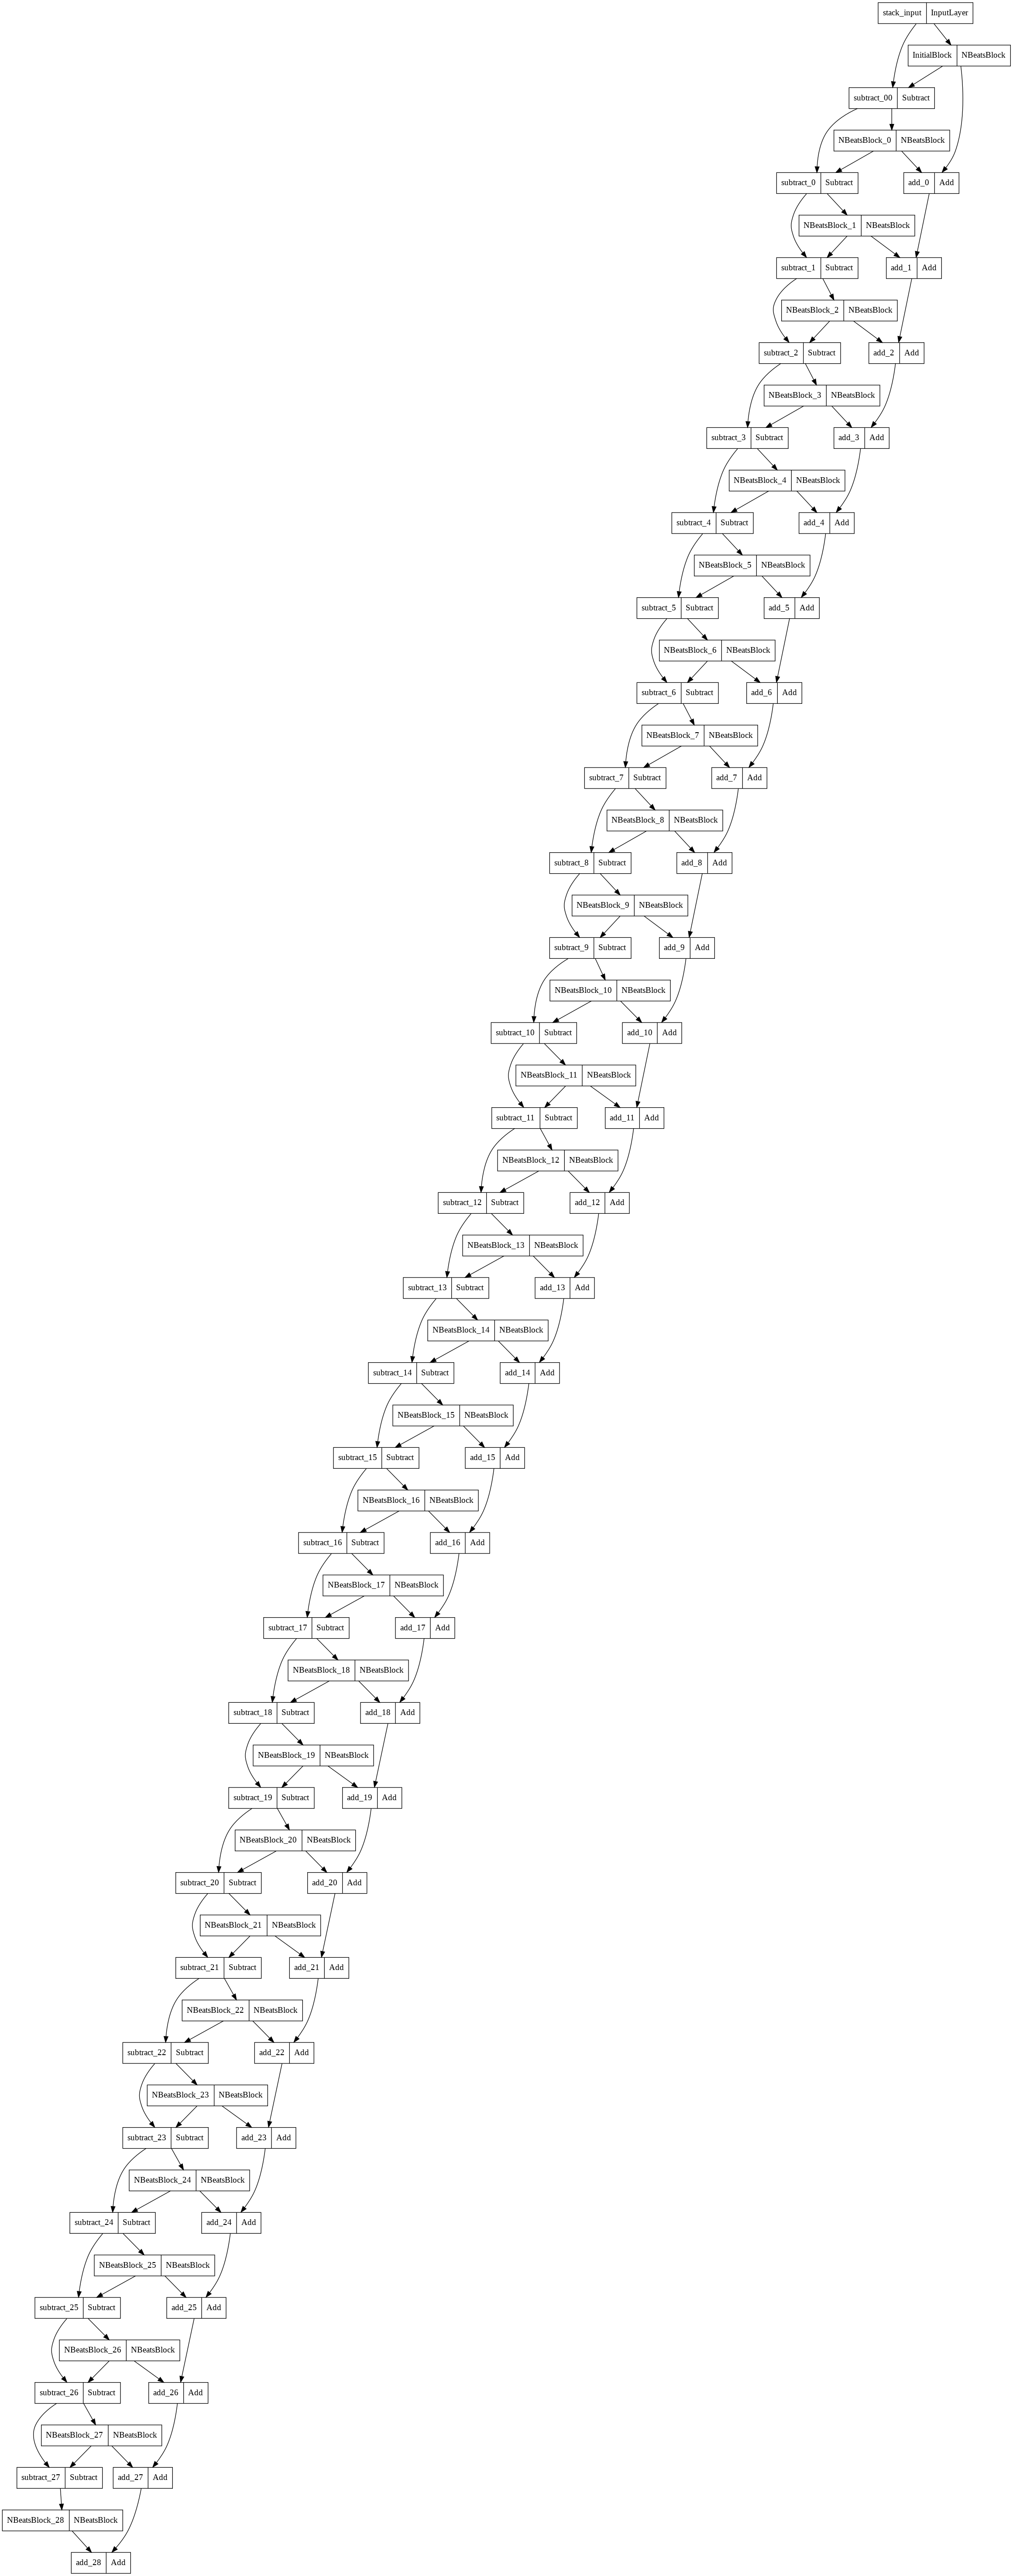

In [ ]:
# # Plot the N-BEATS mode and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating ensemble model

### Constructing and fitting and ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae","mse","mape"]):
  # Making empty list for trained ensemble models
  ensemble_models = []

  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
                                   # Initialize dense layers with normal distribution for estimating prediction intervals later on
                                   layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                                   layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                                   layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae","mse"])

      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)
  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00682: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00945: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00494: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00594: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 0

In [ ]:
len(ensemble_models)

15

In [ ]:
ensemble_models

In [ ]:
!nvidia-smi

Mon Feb 14 01:56:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    59W / 149W |   1304MiB / 11441MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Make predictions with our ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 747 ms, sys: 40.3 ms, total: 788 ms
Wall time: 805 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8790.299,  8762.831,  9019.502, ..., 50064.082, 49108.11 ,
        46422.54 ],
       [ 8784.523,  8738.473,  8999.113, ..., 49036.383, 48783.863,
        45571.863],
       [ 8732.569,  8719.408,  9093.387, ..., 49921.895, 47992.15 ,
        45316.44 ],
       ...,
       [ 8978.439,  8841.03 ,  9107.789, ..., 49666.875, 49997.156,
        46804.742],
       [ 8730.457,  8804.8  ,  9104.373, ..., 49607.934, 48547.164,
        45045.566],
       [ 8823.311,  8768.297,  9047.492, ..., 49759.906, 48090.945,
        45874.336]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8795.845 ,  8781.463 ,  9060.685 ,  8725.535 ,  8746.506 ,
        8717.8125,  8663.169 ,  8481.871 ,  8458.641 ,  8523.765 ,
        8202.637 ,  8108.9736,  8049.7065,  7631.9917,  7283.6157,
        7304.141 ,  7085.8735,  7210.61  ,  7113.615 ,  7538.488 ,
        7380.653 ,  7741.4697,  7553.87  ,  7394.4004,  7321.9697,
        7310.5093,  7203.1987,  7389.007 ,  7506.466 ,  7538.644 ,
        7545.2363,  7329.245 ,  7233.442 ,  7177.9365,  7185.436 ,
        7230.9966,  7081.5093,  7101.739 ,  6872.2173,  6595.1895,
        7399.304 ,  7169.264 ,  7174.1484,  7256.7275,  7268.9546,
        7191.7603,  7217.4517,  7207.929 ,  7180.3794,  7212.943 ,
        7305.564 ,  7384.9395,  7245.431 ,  7169.734 ,  7160.1953,
        6948.2256,  7279.1587,  7331.2026,  7361.791 ,  7706.18  ,
        8065.407 ,  8138.307 ,  7851.887 ,  8094.01  ,  8100.1567,
        8172.312 ,  8098.929 ,  8742.69  ,  8893.0625,  8771.517 ,
        8934.8

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8793.002 , 8781.975 , 9060.421 , 8708.829 , 8752.471 , 8726.1045,
       8647.805 , 8476.535 , 8452.97  , 8520.541 ], dtype=float32)

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_test,
                                  ensemble_preds)
ensemble_results

{'mae': 580.883,
 'mape': 2.6611104,
 'mase': 1.0204506,
 'mse': 1181163.5,
 'rmse': 1086.6191}

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_test,
                                  ensemble_mean)
ensemble_results

{'mae': 567.33057,
 'mape': 2.5797932,
 'mase': 0.99664265,
 'mse': 1141788.4,
 'rmse': 1068.545}

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_test,
                                  ensemble_median)
ensemble_results

{'mae': 567.8216,
 'mape': 2.5802042,
 'mase': 0.99750525,
 'mse': 1144265.1,
 'rmse': 1069.7032}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

### Plotting the prediction intervals(uncertainty estimates) of ensemble

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds):
  
  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(ensemble_preds)

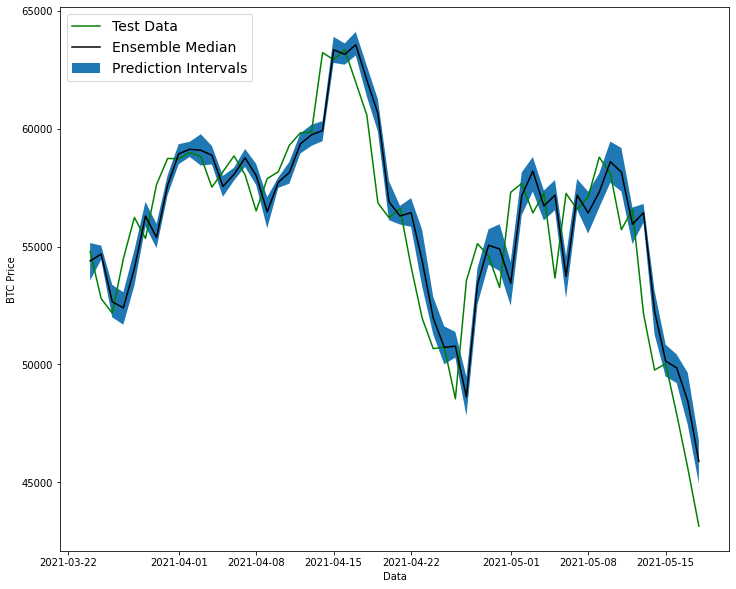

In [ ]:
# Get the median/mean values of ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with prediction intervals
offset = 500
plt.figure(figsize=(12,10))
plt.plot(X_test.index[offset:], y_test[offset:],"g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:],"k-", label="Ensemble Median")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:],
                 label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

## Model 9: Train a model on the full historical data to make predictions into the future

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()

y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
len(X_all), len(y_all)

(2780, 2780)

In [ ]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
                               layers.Dense(128,activation="relu"),
                               layers.Dense(128, activation="relu"),
                               layers.Dense(HORIZON)
],name="model_9")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit 
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [ ]:
INTO_FUTURE = 14

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE):
  """
  Make future forecasts into_future steps after values ends.
  Returns future forecasts as a list of floats
  """
  # 2. Create an empty list for future forecasts / prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then apend it again, agiain
     future_pred = model.predict(tf.expand_dims(last_window, axis=0))
     print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

     # Append predictions to future_forecast
     future_forecast.append(tf.squeeze(future_pred).numpy())

     # Update last window with new pred and get WINDOW_SIZE most recent preds 
     last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast


In [ ]:
# Make forecasts into the future
future_forecasts = make_future_forecasts(values=y_all,
                                         model=model_9,
                                         into_future=INTO_FUTURE)

Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.46484375

Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Prediction: 50985.9453125

Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Prediction: 48522.96484375

Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96484375] -> Prediction: 48137.203125

Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96484375 48137.203125  ] -> Prediction: 47880.63671875

Predicting on: 
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96484375 48137.203125   47880.63671875] -> Prediction: 46879.71875

Predicting on: 
 [43144.47129086 55764.46484375 50985.9453125  48522.96

In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


### Plot future forecasts

In [ ]:
future_forecasts

[55764.465,
 50985.945,
 48522.965,
 48137.203,
 47880.637,
 46879.72,
 48227.6,
 53963.69,
 49685.56,
 47596.176,
 48114.43,
 48808.008,
 48623.855,
 50178.723]

In [ ]:
def get_future_dates(start_date,into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date + into_future
  """
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecasts = np.insert(future_forecasts, 0, btc_price[-1])


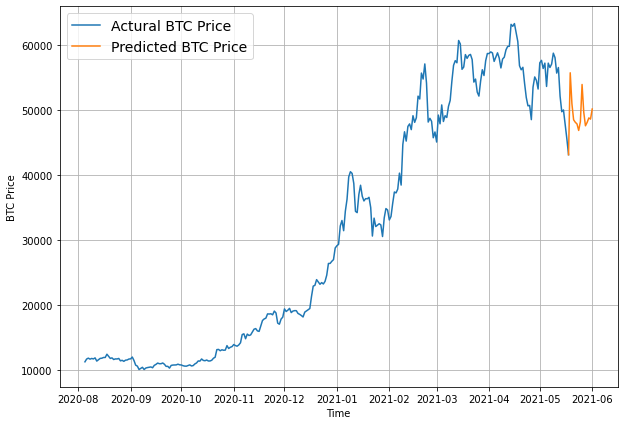

In [ ]:
# Plot future prices predictions ofBitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price, start=2500, format="-", label="Actural BTC Price")
plot_time_series(next_time_steps, future_forecasts, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
len(btc_price_turkey)

2787

In [ ]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

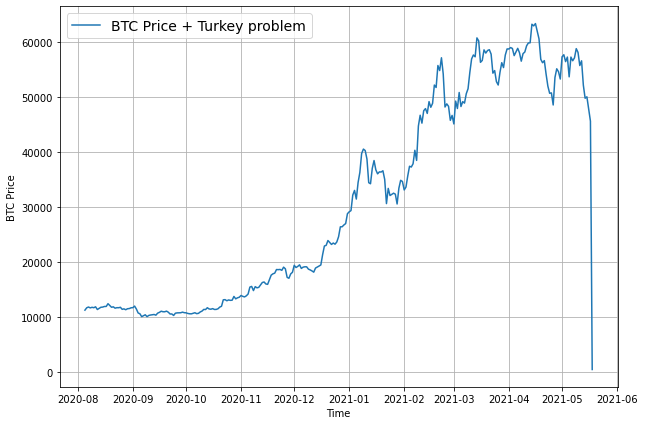

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500)

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model

In [ ]:
# Clone mode l architeture
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"

turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train,y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test,y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 719.4105


719.4105224609375

In [ ]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 5ms/step - loss: 640.1680


640.16796875

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17126.209,
 'mape': 121.31486,
 'mase': 26.502863,
 'mse': 614238300.0,
 'rmse': 23709.021}

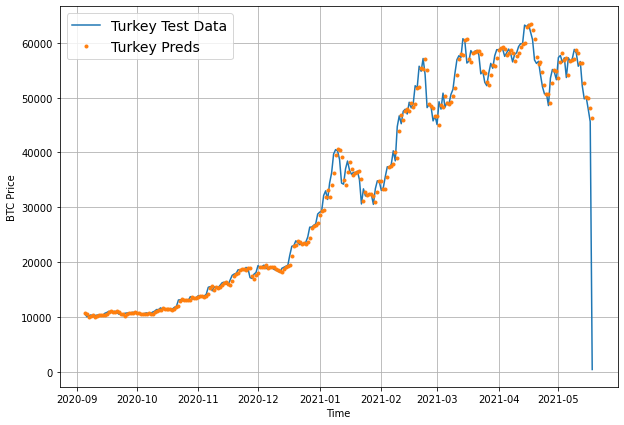

In [ ]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(X_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

## Compare models

In [ ]:
# Compare different model results
model_results = pd.DataFrame({"naive model":naive_results,
                              "model_1_dense_w7_h1":model_1_results,
                              "model_2_dense_w30_h1":model_2_results,
                              "model_3_dense_w30_h7":model_3_results,
                              "model_4_CONV1D":model_4_results,
                              "model_5_LSTM":model_5_results,
                              "model_6_multivariate":model_6_results,
                              "model_7_NBEATS":model_7_results,
                              "model_8_ensemble":ensemble_results,
                              "model_10_turkey":turkey_results}).T
model_results

,mae,mse,rmse,mape,mase
naive model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,568.951233,1.171744e+06,1082.471313,2.544898,0.999490
model_2_dense_w30_h1,608.961487,1.281439e+06,1132.006470,2.769339,1.064471
model_3_dense_w30_h7,1237.506348,5.405198e+06,1425.747681,5.558878,2.202073
model_4_CONV1D,570.828430,1.176671e+06,1084.744751,2.559336,1.002787
model_5_LSTM,596.644653,1.273487e+06,1128.488770,2.683845,1.048139
model_6_multivariate,567.586304,1.161687e+06,1077.816040,2.541375,0.997092
model_7_NBEATS,575.552124,1.156970e+06,1075.625122,2.653887,1.011086
model_8_ensemble,567.821594,1.144265e+06,1069.703247,2.580204,0.997505
model_10_turkey,17126.208984,6.142383e+08,23709.021484,121.314857,26.502863


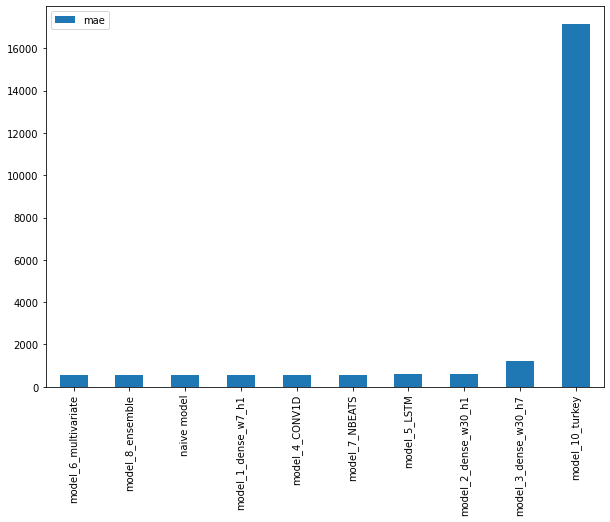

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7),kind="bar")